In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

# Model Evaluation
from sklearn.metrics import mean_absolute_error

In [3]:
data = pd.read_csv('home_values_texas.csv')

In [8]:
data.head()

,id,address,city,county,countyFIPS,state,zipcode,latitude,longitude,bedrooms,...,yearBuilt,taxYear,taxAssessedValue,taxMarketValue,taxImprovementValue,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimatedValue
0,236813509,111 HILLTOP DR,NAPLES,Henderson,48343,TX,75568.0,33.197100,-94.681362,0,...,1962.0,2018,65960.0,65960.0,63810.0,1911-11-11,NaN,NaN,NaN,89724
1,166249408,707 KAY DR,LONGVIEW,Henderson,48203,TX,75601.0,32.506533,-94.684592,0,...,1960.0,2018,140640.0,140640.0,121250.0,1993-01-01,NaN,NaN,NaN,170819
2,215428762,9803 FM 251 S,BIVINS,Henderson,48067,TX,75555.0,32.965092,-94.103827,0,...,1999.0,2018,65800.0,65800.0,58270.0,1990-11-14,NaN,NaN,NaN,87347
3,215055126,408 E HINES ST,TALCO,Henderson,48449,TX,75487.0,33.362020,-95.099580,0,...,1946.0,2018,27942.0,27942.0,25259.0,NaN,NaN,NaN,NaN,39864
4,235563264,440 W ALABAMA ST,AVERY,Henderson,48387,TX,75554.0,33.549630,-94.783930,0,...,1926.0,2018,54369.0,54369.0,52473.0,2008-11-07,NaN,NaN,NaN,64577


In [9]:
# henderson county
henderson = data.county == 'Henderson'

In [11]:
hd = data[henderson]

,id,address,city,county,countyFIPS,state,zipcode,latitude,longitude,bedrooms,...,yearBuilt,taxYear,taxAssessedValue,taxMarketValue,taxImprovementValue,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimatedValue
0,236813509,111 HILLTOP DR,NAPLES,Henderson,48343,TX,75568.0,33.197100,-94.681362,0,...,1962.0,2018,65960.0,65960.0,63810.0,1911-11-11,NaN,NaN,NaN,89724
1,166249408,707 KAY DR,LONGVIEW,Henderson,48203,TX,75601.0,32.506533,-94.684592,0,...,1960.0,2018,140640.0,140640.0,121250.0,1993-01-01,NaN,NaN,NaN,170819
2,215428762,9803 FM 251 S,BIVINS,Henderson,48067,TX,75555.0,32.965092,-94.103827,0,...,1999.0,2018,65800.0,65800.0,58270.0,1990-11-14,NaN,NaN,NaN,87347
3,215055126,408 E HINES ST,TALCO,Henderson,48449,TX,75487.0,33.362020,-95.099580,0,...,1946.0,2018,27942.0,27942.0,25259.0,NaN,NaN,NaN,NaN,39864
4,235563264,440 W ALABAMA ST,AVERY,Henderson,48387,TX,75554.0,33.549630,-94.783930,0,...,1926.0,2018,54369.0,54369.0,52473.0,2008-11-07,NaN,NaN,NaN,64577


In [14]:
hd.county.value_counts(), len(hd)

(Henderson    234216
 Name: county, dtype: int64, 234216)

In [19]:
hd.columns

Index(['id', 'address', 'city', 'county', 'countyFIPS', 'state', 'zipcode',
       'latitude', 'longitude', 'bedrooms', 'bathrooms', 'rooms',
       'squareFootage', 'lotSize', 'yearBuilt', 'taxYear', 'taxAssessedValue',
       'taxMarketValue', 'taxImprovementValue', 'lastSaleDate',
       'lastSaleAmount', 'priorSaleDate', 'priorSaleAmount', 'estimatedValue'],
      dtype='object')

In [23]:
q75, q25 = np.percentile(hd.estimatedValue.dropna(), [75 ,25])
# iqr = q75 - q25
 
# min = q25 - (iqr*1.5)
# outlier_iqr_method = q75 + (iqr*1.5)
# outlier_iqr_method
q75

183961.25

In [50]:
hd['luxury'] = hd['estimatedValue'] > q75

In [59]:
lux_hd = hd[hd.luxury == True]
reg_hd = hd[hd.luxury == False]
reg_hd.reset_index()
lux_hd.reset_index()

,index,id,address,city,county,countyFIPS,state,zipcode,latitude,longitude,...,taxYear,taxAssessedValue,taxMarketValue,taxImprovementValue,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimatedValue,luxury
0,10,307677583,432 COUNTY ROAD 429,TENAHA,Henderson,48365,TX,75974.0,NaN,NaN,...,2018,120240.0,120240.0,117150.0,1911-11-11,NaN,NaN,NaN,186498,True
1,11,307697338,1081 COUNTY ROAD 312,DE BERRY,Henderson,48365,TX,75639.0,NaN,NaN,...,2018,172590.0,172590.0,164190.0,NaN,NaN,NaN,NaN,231788,True
2,23,210060646,400 VZ COUNTY ROAD 1923,FRUITVALE,Henderson,48467,TX,75127.0,NaN,NaN,...,2018,NaN,306010.0,NaN,2015-05-28,NaN,NaN,NaN,323000,True
3,31,213733974,175 COUNTY ROAD 32200,SUMNER,Henderson,48277,TX,75486.0,33.688009,-95.624366,...,2018,306370.0,338340.0,291500.0,2008-07-11,NaN,NaN,NaN,310000,True
4,32,210094603,509 VZ COUNTY ROAD 2436,MABANK,Henderson,48467,TX,75147.0,NaN,NaN,...,2018,6500.0,6500.0,NaN,2013-12-04,NaN,1990-01-24,NaN,197000,True
5,65,167662497,13525 TWIN CREEK LN,MABANK,Henderson,48213,TX,75147.0,32.343720,-96.077490,...,2018,167750.0,167750.0,160770.0,1989-09-01,NaN,NaN,NaN,213168,True
6,70,239468148,3120 CLARKSVILLESPC 118,BLOSSOM,Henderson,48277,TX,75416.0,NaN,NaN,...,2018,3460.0,3460.0,3460.0,NaN,NaN,NaN,NaN,198000,True
7,82,213250408,4380 FM 1567 E,COMO,Henderson,48223,TX,75431.0,33.008873,-95.534754,...,2018,196990.0,196990.0,189990.0,NaN,NaN,NaN,NaN,273334,True
8,104,236191136,590 COUNTY ROAD 2619,ALTO,Henderson,48073,TX,75925.0,31.606525,-95.030466,...,2018,160450.0,160450.0,118690.0,2017-05-10,NaN,NaN,NaN,188000,True
9,105,213676295,2430 COUNTY ROAD 4712,CUMBY,Henderson,48223,TX,75433.0,33.158650,-95.738640,...,2018,NaN,366260.0,NaN,2010-06-02,0.0,NaN,NaN,303000,True


In [62]:
# 25 % of Henderson county is 'luxury' -- we defined luxury as being more than q75 here
len(lux_hd), len(hd), (len(lux_hd)/len(hd))*100
# now we have 2 subsets
## It's all good, but you can't use it as this calculations is the fuction of our target var and so we can't know the value for the new data point. 

(58554, 234216, 25.0)

In [60]:
# just for triple cheking why not
len(reg_hd), len(hd), (len(reg_hd)/len(hd))*100

(175662, 234216, 75.0)

In [ ]:
# now we first fit regular to Linear Model, then Lux to linear model, see what happens


### Regular Linear Regression Model

In [67]:
hd.columns

Index(['id', 'address', 'city', 'county', 'countyFIPS', 'state', 'zipcode',
       'latitude', 'longitude', 'bedrooms', 'bathrooms', 'rooms',
       'squareFootage', 'lotSize', 'yearBuilt', 'taxYear', 'taxAssessedValue',
       'taxMarketValue', 'taxImprovementValue', 'lastSaleDate',
       'lastSaleAmount', 'priorSaleDate', 'priorSaleAmount', 'estimatedValue',
       'luxury'],
      dtype='object')

In [66]:
# Data prep
hd = hd.copy()
hd.dropna()
hd = hdata._get_numeric_data()
hdata = hdata[['bathrooms','squareFootage', 'lotSize', 'yearBuilt',
       'taxYear', 'taxAssessedValue', 'taxMarketValue', 'taxImprovementValue', 'estimatedValue']].dropna()

features = hdata.drop(['estimatedValue'], 1)

234216

Text(0, 0.5, '$ AVG Estimated Cost')

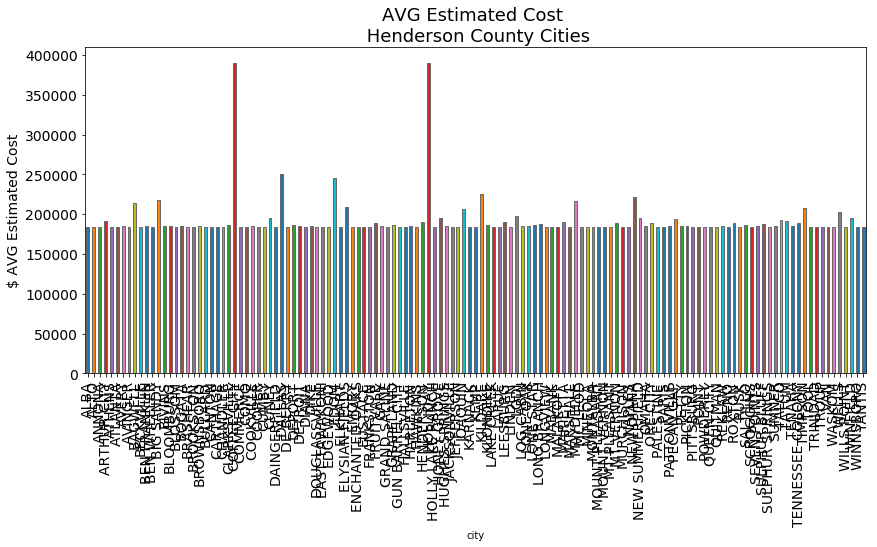

In [61]:
# looking into the prices in different cities
plt.title('AVG Estimated Cost \n Henderson County Cities', fontsize = 18)
plt.grid(c = 'lemonchiffon', linestyle = '--')

ax = lux_hd.groupby('city').min()['estimatedValue'].sort_index().plot.bar(
    figsize = (14,6),
    fontsize = 14, edgecolor='dimgrey')

plt.ylabel('$ AVG Estimated Cost', fontsize = 14)

In [ ]:
# 0. Refit into Linear REgression and calculate MAE 
# 1. I want to create a model for all the cities that have mean > than Q75, 
# 2. I want to fit RF regression on the excisting data and calculate MAE
# 3. I want to remove just one outlier